# Maret Ismoyo

## Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sbs
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

## Data Exploration

In [4]:
dokumen = pd.read_csv('kc_house_3_features.csv')
dokumen.head(20)

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0
5,5420,4760,3890,1225000.0
6,1715,2238,1715,257500.0
7,1060,1650,1060,291850.0
8,1780,1780,1050,229500.0
9,1890,2390,1890,323000.0


In [5]:
dokumen.shape

(100, 4)

In [6]:
dokumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    100 non-null    int64  
 1   sqft_living15  100 non-null    int64  
 2   sqft_above     100 non-null    int64  
 3   price          100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [7]:
dokumen.sqft_living.nunique()

82

## Korelasi dan Regresi

In [8]:
dokumen.columns

Index(['sqft_living', 'sqft_living15', 'sqft_above', 'price'], dtype='object')

In [9]:
korelasi = dokumen.corr()
korelasi

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


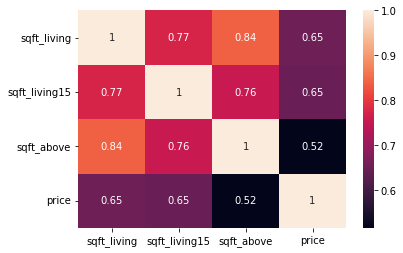

In [10]:
sbs.heatmap(korelasi, annot=True)
plt.show()

In [11]:
dokumen.columns

Index(['sqft_living', 'sqft_living15', 'sqft_above', 'price'], dtype='object')

## Split Data

In [12]:
x = dokumen[['sqft_living', 'sqft_living15', 'sqft_above']]
y = dokumen.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=21) # untuk membagi data 
print(f'dokumen = {dokumen.shape}\nx_train = {x_train.shape}\nx_test = {x_test.shape}\ny_train = {y_train.shape}\ny_test = {y_test.shape}')

dokumen = (100, 4)
x_train = (80, 3)
x_test = (20, 3)
y_train = (80,)
y_test = (20,)


## Linear Regression Modelling 

In [13]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [14]:
prediksi = pd.DataFrame(linreg.predict(x_test))
prediksi.columns = ['y_prediksi']
prediksi['y_prediksi'] = prediksi['y_prediksi'].apply(lambda x : round(x,2))
prediksi['y_asli'] = list(y_test)
prediksi['error'] = abs(prediksi['y_prediksi']-prediksi['y_asli'])
prediksi

,y_prediksi,y_asli,error
0,246895.54,252700.0,5804.46
1,441708.95,360000.0,81708.95
2,519470.46,940000.0,420529.54
3,574956.47,322500.0,252456.47
4,612550.58,505000.0,107550.58
5,240548.30,210490.0,30058.30
6,914779.20,861990.0,52789.20
7,288436.68,280000.0,8436.68
8,391871.98,430000.0,38128.02
9,310106.26,468000.0,157893.74


In [15]:
prediksi.describe()

,y_prediksi,y_asli,error
count,20.000000,20.000000,20.00000
mean,466888.721500,489209.000000,137897.75150
std,206973.177109,235422.093112,126105.74577
min,185928.750000,204000.000000,836.33000
25%,298883.737500,300000.000000,25739.69000
50%,453912.895000,449000.000000,102592.24500
75%,584271.387500,634375.000000,253760.03750
max,914779.200000,975000.000000,420529.54000


In [16]:
dokumen.columns

Index(['sqft_living', 'sqft_living15', 'sqft_above', 'price'], dtype='object')

In [17]:
mean_absolute_error(prediksi['y_prediksi'], y_test)

137897.75149999998

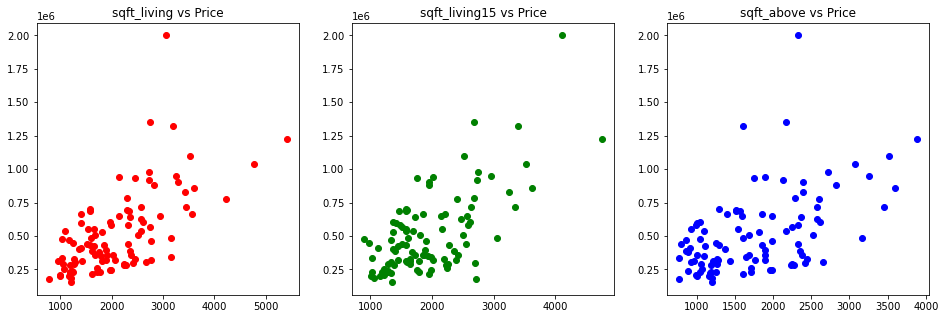

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title('sqft_living vs Price')
plt.plot(dokumen['sqft_living'], dokumen.price, 'or')

plt.subplot(132)
plt.title('sqft_living15 vs Price')
plt.plot(dokumen['sqft_living15'], dokumen.price, 'og')

plt.subplot(133)
plt.title('sqft_above vs Price')
plt.plot(dokumen['sqft_above'], dokumen.price, 'ob') 
plt.show()

## Checking the errors

In [19]:
scaler = MinMaxScaler()
new_dokumen = dokumen[['sqft_living', 'sqft_living15', 'sqft_above', 'price']]
scaled_new_dokumen = pd.DataFrame(scaler.fit_transform(new_dokumen))
scaled_new_dokumen.columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'price']
scaled_new_dokumen.head()

,sqft_living,sqft_living15,sqft_above,price
0,0.088172,0.116279,0.1328,0.037304
1,0.387097,0.206718,0.4496,0.208446
2,0.000000,0.472868,0.0016,0.014618
3,0.255914,0.121447,0.0912,0.244180
4,0.195699,0.235142,0.2928,0.193286


In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    scaled_new_dokumen[
        ['sqft_living','sqft_living15','sqft_above']], 
        scaled_new_dokumen.price, 
        test_size=.2, 
        random_state=21)

In [21]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
mean_absolute_error(lr2.predict(x_test), y_test)
print(f'Jadi, errornya adalah = {mean_absolute_error(lr2.predict(x_test), y_test)} atau {float(mean_absolute_error(lr2.predict(x_test), y_test)):.1}')

Jadi, errornya adalah = 0.0746603956495123 atau 0.07
